In [169]:
import numpy as np
import pandas as pd

In [170]:
df = pd.read_csv('covid_sal.csv')
df

,Unnamed: 0,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION
0,0,65,2,2,2,2,2,1
1,1,72,97,2,2,2,2,1
2,2,55,97,1,2,2,2,2
3,3,53,2,2,2,2,2,2
4,4,68,97,1,2,2,2,1
...,...,...,...,...,...,...,...,...
1048570,1048570,40,97,2,2,2,2,2
1048571,1048571,51,97,2,2,2,2,1
1048572,1048572,55,97,2,2,2,2,2
1048573,1048573,28,97,2,2,2,2,2


In [171]:
df.columns

Index(['Unnamed: 0', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION'],
      dtype='object')

In [172]:
df = df.rename(columns = {"Unnamed: 0": "Patient Key"}) #changing name of 'unnamed: 0 to patient key'
df

,Patient Key,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION
0,0,65,2,2,2,2,2,1
1,1,72,97,2,2,2,2,1
2,2,55,97,1,2,2,2,2
3,3,53,2,2,2,2,2,2
4,4,68,97,1,2,2,2,1
...,...,...,...,...,...,...,...,...
1048570,1048570,40,97,2,2,2,2,2
1048571,1048571,51,97,2,2,2,2,1
1048572,1048572,55,97,2,2,2,2,2
1048573,1048573,28,97,2,2,2,2,2


In [173]:
df.columns = df.columns.str.lower() #lower casing all the column names
df

,patient key,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension
0,0,65,2,2,2,2,2,1
1,1,72,97,2,2,2,2,1
2,2,55,97,1,2,2,2,2
3,3,53,2,2,2,2,2,2
4,4,68,97,1,2,2,2,1
...,...,...,...,...,...,...,...,...
1048570,1048570,40,97,2,2,2,2,2
1048571,1048571,51,97,2,2,2,2,1
1048572,1048572,55,97,2,2,2,2,2
1048573,1048573,28,97,2,2,2,2,2


In [174]:
c = df['age'].unique() #getting all unique ages to get an idea of what type of ages are present. Also checking for NaNs
np.sort(c)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117,
       118, 119, 120, 121], dtype=int64)

In [175]:
df['age'].groupby(df['age']).count() #getting count of each age

age
0      3862
1      4802
2      3178
3      2559
4      2485
       ... 
117       3
118       2
119       3
120       5
121       1
Name: age, Length: 121, dtype: int64

Turn the bool values of 2 and 1 into 'No' and 'Yes' respectively. And 97 or 98 into NaN

In [176]:
df['pregnant'].unique()

array([ 2, 97, 98,  1], dtype=int64)

In [177]:
df['diabetes'].unique()

array([ 2,  1, 98], dtype=int64)

In [178]:
df['asthma'].unique()

array([ 2,  1, 98], dtype=int64)

In [179]:
df['inmsupr'].unique()

array([ 2,  1, 98], dtype=int64)

In [180]:
df['hipertension'].unique()

array([ 1,  2, 98], dtype=int64)

In [181]:
map_dict = {2:'No', 1: 'Yes', 98: np.nan, 97:np.nan} #this is used to change 2 to No, 1 to Yes and 98 or 97 to NaN


df1 = df
for i in df.columns:
    if i!= 'patient key' and i!= 'age':
        df1.replace({i:map_dict}, inplace = True)
df1

,patient key,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension
0,0,65,No,No,No,No,No,Yes
1,1,72,NaN,No,No,No,No,Yes
2,2,55,NaN,Yes,No,No,No,No
3,3,53,No,No,No,No,No,No
4,4,68,NaN,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...
1048570,1048570,40,NaN,No,No,No,No,No
1048571,1048571,51,NaN,No,No,No,No,Yes
1048572,1048572,55,NaN,No,No,No,No,No
1048573,1048573,28,NaN,No,No,No,No,No


Some graphs
- check for outliers in age

In [182]:
import matplotlib.pyplot as plt

<AxesSubplot:>

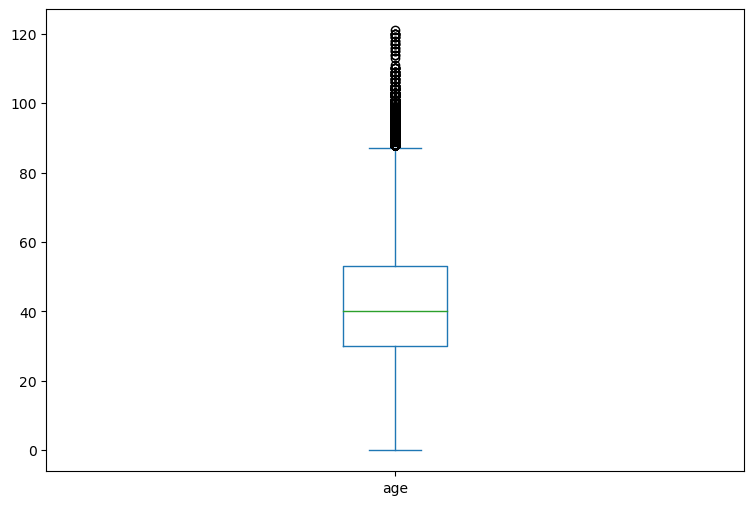

In [183]:
%matplotlib inline  
plt.figure(figsize = (9,6))
df1['age'].plot.box() #checking for outliers


In [19]:
from scipy import stats
#all code below is for removing outliers
data = df1['age'] 
z_score = stats.zscore(data) #obtaining zscores

df_z_score = pd.DataFrame(z_score)
df_data = pd.DataFrame(data)  #placing data into dataframe

df_data_removed_outliers = data[(z_score <3) | (z_score < -3)] #removing zscores
df_data_removed_outliers
display(data.shape, df_data_removed_outliers.shape) #obtaining shape to make sure rows are removed

(1048575,)

(1046899,)

In [184]:
data.shape[0] - df_data_removed_outliers.shape[0] #number of outliers deleted

1676

<AxesSubplot:>

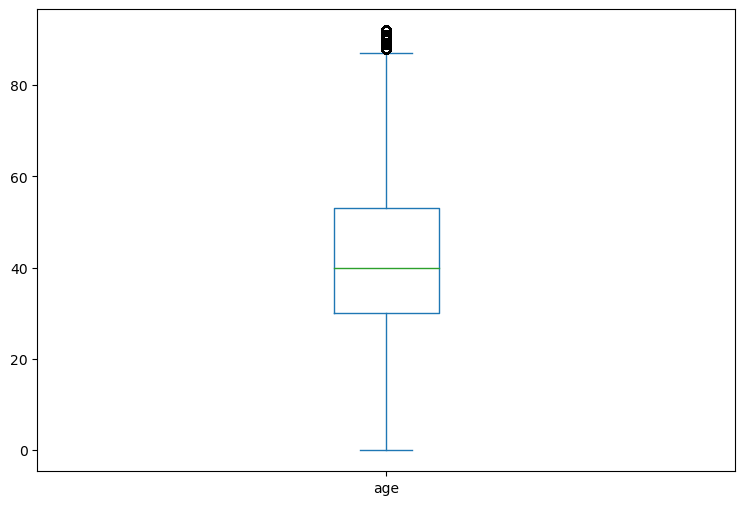

In [185]:
#1676 rows removed. 

%matplotlib inline 
plt.figure(figsize = (9,6))
df_data_removed_outliers.plot.box() #graph after removal of outliers


In [186]:
df1

,patient key,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension
0,0,65,No,No,No,No,No,Yes
1,1,72,NaN,No,No,No,No,Yes
2,2,55,NaN,Yes,No,No,No,No
3,3,53,No,No,No,No,No,No
4,4,68,NaN,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...
1048570,1048570,40,NaN,No,No,No,No,No
1048571,1048571,51,NaN,No,No,No,No,Yes
1048572,1048572,55,NaN,No,No,No,No,No
1048573,1048573,28,NaN,No,No,No,No,No


Grouping data

In [187]:
# returns the index of given dataframe and column name
def colFinder(datFram, col):
    return datFram.columns.get_loc(col)

display(colFinder(df1, 'diabetes'), colFinder(df1,'asthma')) #testing the column index finder

3

5

In [188]:
#diabetes and asthma? The filtering is done to obtain numbers of individuals for further operations

#yes and yes
diabetesYes_asthmaYes = df[(df.iloc[:,3] == 'Yes') & (df.iloc[:,5] == 'Yes')]

#No and Yes
diabetesNo_asthmaYes = df[(df.iloc[:,3] == 'No') & (df.iloc[:,5] == 'Yes')]

#Yes and no
diabetesYes_asthmaNo = df[(df.iloc[:,3] == 'Yes') & (df.iloc[:,5] == 'No')]

#No and No
diabetesNo_asthmaNo = df[(df.iloc[:,3] == 'No') & (df.iloc[:,5] == 'No')]


#None of the health complications filtered
noComplications = df[(df.iloc[:,colFinder(df1,'diabetes')] == 'No') & (df.iloc[:,colFinder(df1,'copd')] =='No') 
                     & (df.iloc[:,colFinder(df1,'asthma')] =='No') & (df.iloc[:,colFinder(df1,'inmsupr')] =='No')
                     & (df.iloc[:,colFinder(df1,'hipertension')] =='No')]

#all of the health complications filtered
allComplications = df[(df.iloc[:,colFinder(df1,'diabetes')] == 'Yes') & (df.iloc[:,colFinder(df1,'copd')] =='Yes') 
                     & (df.iloc[:,colFinder(df1,'asthma')] =='Yes') & (df.iloc[:,colFinder(df1,'inmsupr')] =='Yes')
                     & (df.iloc[:,colFinder(df1,'hipertension')] =='Yes')]

In [189]:
#this code is to obtain simple statistics in terms of number of individuals with the specific conditions mentioned
print('Mean age of people with diabetes and asthma is: ', diabetesYes_asthmaYes['age'].mean())
print('Mean age of people with no diabetes and no asthma is: ', diabetesNo_asthmaNo['age'].mean())
print('Mean age of people without the mentioned health complications: ', noComplications['age'].mean())

Mean age of people with diabetes and asthma is:  53.149535059060064
Mean age of people with no diabetes and no asthma is:  39.78204026385408
Mean age of people without the mentioned health complications:  37.83928948473015


In [190]:
#More statistics of specific conditions mentioned below. 
print('Number of people with all complications: ', allComplications['age'].count())
print('Mean number of people without the mentioned health complications: ', noComplications['age'].count())
print('Mean age of people with all complications: ', allComplications['age'].mean())

Number of people with all complications:  187
Mean number of people without the mentioned health complications:  786190
Mean age of people with all complications:  43.94652406417112


In [191]:
#A two way table showing the mean number of individuals with and without diabetes and asthma
df1['age'].groupby([df.iloc[:,3], df.iloc[:,5]]).mean().unstack()

asthma,No,Yes
diabetes,,
No,39.782040,37.261594
Yes,57.086878,53.149535


In [192]:
#Here, we will create a new column that hold bins, holding age ranges of individuals. If they are above 75, it is simply 75+.
df1['age_range'] = pd.cut(x=df1['age'], bins=[0,15, 30,45, 60,75,90,105,120,135], labels = ['0-15','16-30','31-45','46-60','61-75','75+','75+','75+','75+'], ordered = False)
df1

,patient key,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,age_range
0,0,65,No,No,No,No,No,Yes,61-75
1,1,72,NaN,No,No,No,No,Yes,61-75
2,2,55,NaN,Yes,No,No,No,No,46-60
3,3,53,No,No,No,No,No,No,46-60
4,4,68,NaN,Yes,No,No,No,Yes,61-75
...,...,...,...,...,...,...,...,...,...
1048570,1048570,40,NaN,No,No,No,No,No,31-45
1048571,1048571,51,NaN,No,No,No,No,Yes,46-60
1048572,1048572,55,NaN,No,No,No,No,No,46-60
1048573,1048573,28,NaN,No,No,No,No,No,16-30


<BarContainer object of 6 artists>

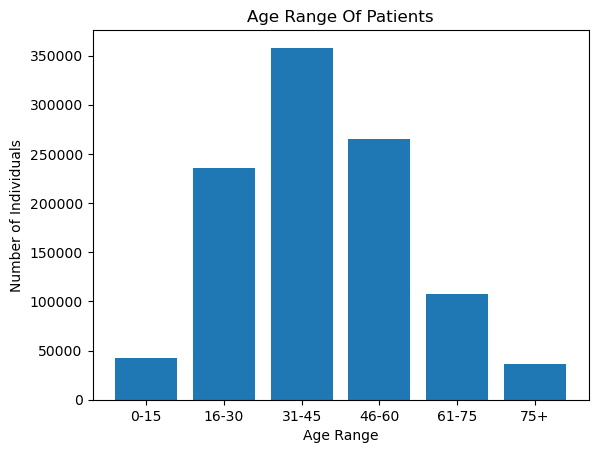

In [193]:
import matplotlib.pyplot as plt
#here we want to make a graph showing the number of individuals within the age ranges
ageRangeCount = df1.groupby(['age_range'])['age_range'].count() #grouping by age_range.
listCount = []
for i in ageRangeCount:
    listCount.append(i)
    
plt.title('Age Range Of Patients') #title of graph
plt.xlabel('Age Range')
plt.ylabel('Number of Individuals')
plt.bar(ageRangeCount.index.values, listCount)